In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import pandas as pd

In [10]:
df = pd.read_csv(r"C:\spuyangoren\COLLEGE\Lab\IPL\Sync.Bio.Optics\Electrical response\THESIS\CV_1 only.csv")
df_20 = pd.read_csv(r"C:\spuyangoren\COLLEGE\Lab\IPL\Sync.Bio.Optics\Electrical response\THESIS\CV_20 mv.csv")

df_20

,V_20,i_50
0,0.002124,-0.146179
1,0.005209,-0.124817
2,0.007254,0.054016
3,0.010074,-0.082397
4,0.012814,-0.144653
...,...,...
1389,0.009485,-0.389709
1390,0.007584,-0.409241
1391,0.004959,-0.237427
1392,0.002786,-0.366211


In [11]:
v = df['Voltage'].to_numpy()
i = df['Current'].to_numpy()

v_20 = df_20['V_20'].to_numpy()
i_20 = df_20['i_50'].to_numpy()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Seanuel\AppData\Local\Temp\ipykernel_3932\3960191441.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Current  ($\mu$A)", fontsize=15)


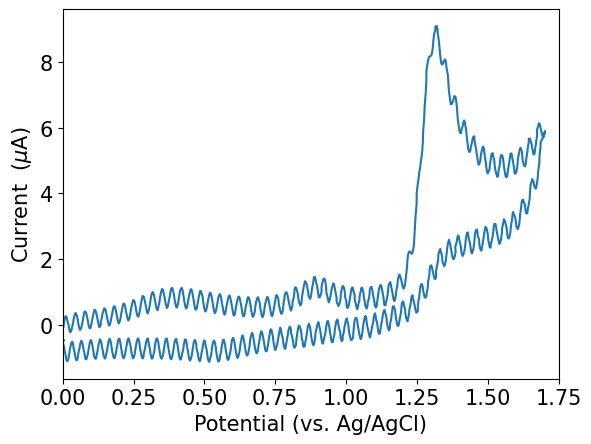

In [12]:
plt.plot(v, i)
plt.xlim(0, 1.75)
plt.xlabel("Potential (vs. Ag/AgCl)", fontsize=15)
plt.ylabel("Current  ($\mu$A)", fontsize=15)

plt.tick_params(labelsize=15)

plt.savefig("CV_raw.pdf", format="pdf", bbox_inches="tight")
plt.show()

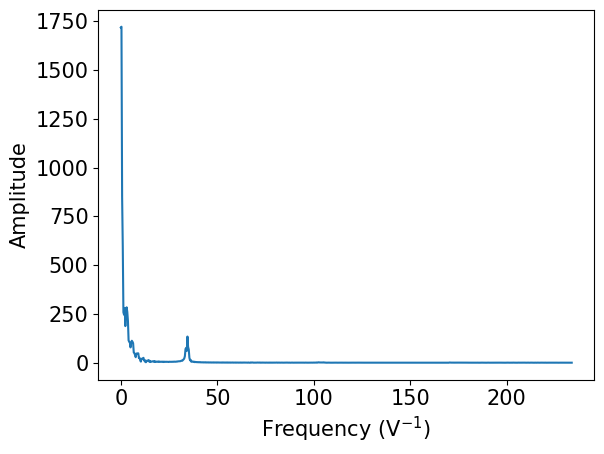

In [13]:
N = len(i)
T = v[1] - v[0]

ft_i = fft(i)
freqs = fftfreq(N, T)

plt.plot(freqs[:N//2], np.abs(ft_i[:N//2]))
plt.xlabel("Frequency (V$^{-1})$", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)

plt.tick_params(labelsize=15)

plt.savefig("CV_raw_FT.pdf", format="pdf", bbox_inches="tight")
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Seanuel\AppData\Local\Temp\ipykernel_3932\838695575.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Current  ($\mu$A)", fontsize=15)


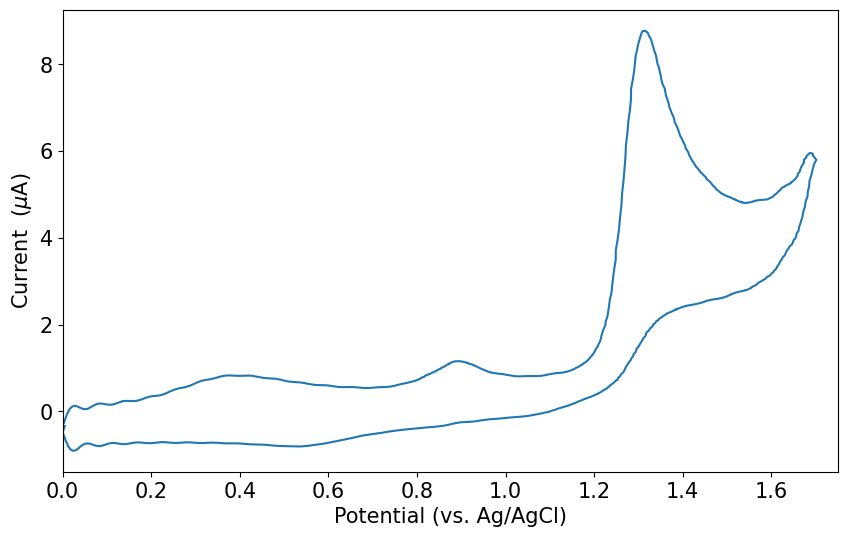

In [14]:
cutoff = 20
ft_i_filtered = ft_i.copy()
ft_i_filtered[np.abs(freqs) > cutoff] = 0

i_clean = np.real(ifft(ft_i_filtered))

plt.figure(figsize=(10,6))
plt.plot(v, i_clean)

plt.xlim(0, 1.75)
plt.xlabel("Potential (vs. Ag/AgCl)", fontsize=15)
plt.ylabel("Current  ($\mu$A)", fontsize=15)

plt.tick_params(labelsize=15)

plt.savefig("CV_cleaned.pdf", format="pdf", bbox_inches="tight")
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Seanuel\AppData\Local\Temp\ipykernel_3932\2010892197.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Current  ($\mu$A)", fontsize=15)


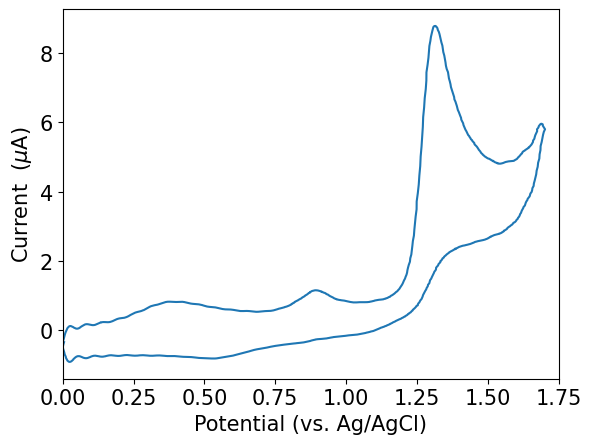

In [ ]:
plt.plot(v, i_clean)

plt.xlim(0, 1.75)
plt.xlabel("Potential (vs. Ag/AgCl)", fontsize=15)
plt.ylabel("Current  ($\mu$A)", fontsize=15)

plt.tick_params(labelsize=15)

plt.savefig("CV_cleaned_small.pdf", format="pdf", bbox_inches="tight")
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Seanuel\AppData\Local\Temp\ipykernel_3932\2799782524.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Current  ($\mu$A)", fontsize=15)


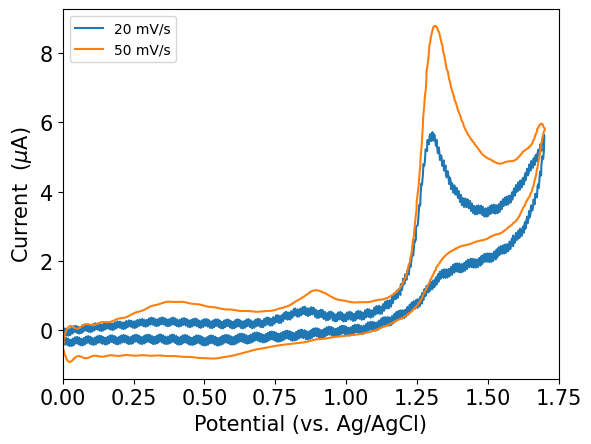

In [ ]:


plt.plot(v_20, i_20, label='20 mV/s')
plt.plot(v, i_clean, label='50 mV/s')


plt.xlim(0, 1.75)
plt.xlabel("Potential (vs. Ag/AgCl)", fontsize=15)
plt.ylabel("Current  ($\mu$A)", fontsize=15)
plt.legend()

plt.tick_params(labelsize=15)

plt.savefig(r"C:\spuyangoren\COLLEGE\Lab\IPL\Sync.Bio.Optics\Electrical response\THESIS\CV_cleaned_small_2.pdf", format="pdf", bbox_inches="tight")

plt.show()

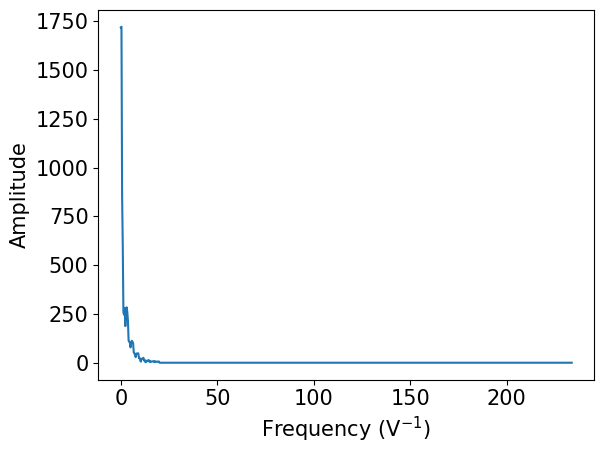

In [17]:
plt.plot(freqs[:N//2], np.abs(ft_i_filtered[:N//2]))
plt.xlabel("Frequency (V$^{-1})$", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)

plt.tick_params(labelsize=15)

plt.savefig("CV_cleaned_FT.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [18]:
dI_dV = np.gradient(i_clean, v)

mask = (v >= 1.0) & (v <= 1.5)
v_range = v[mask]
dI_dV_range = dI_dV[mask]

threshold = max(dI_dV_range) * 0.02
onset_index = np.where(dI_dV_range > threshold)[0]

E_onset = v_range[onset_index[0]] if len(onset_index) > 0 else None

E_onset

c:\Users\Seanuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\Seanuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\Seanuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\Seanuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1298: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


np.float64(1.197509766)

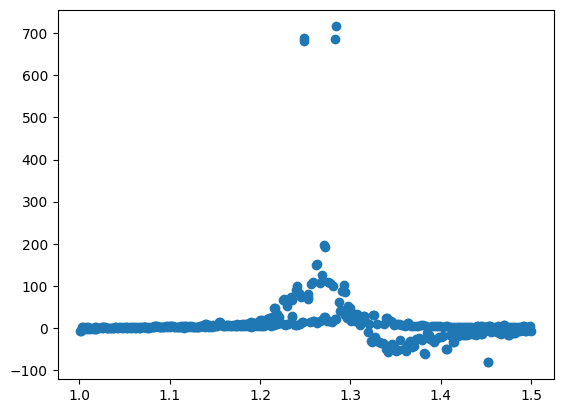

In [19]:
plt.scatter(v_range, dI_dV_range)
plt.show()